In [22]:
from ActiveLearnerClass import ActiveLearner
import matplotlib.pyplot as plt
import groupplot as grp
import numpy as np

/Users/danielharper/miniconda3/envs/molSimplify/lib/python3.6/site-packages/ipykernel_launcher.py:20: DtypeWarning: Columns (224,225,226,227,237,238,241,242,243,244,245,255,256,257,258,279,280,466,469,472,480,490,491,492,497,498,499,500,501,502,503,515,516,521,524,525,532) have mixed types. Specify dtype option on import or set low_memory=False.


done!
done!
done!
done!


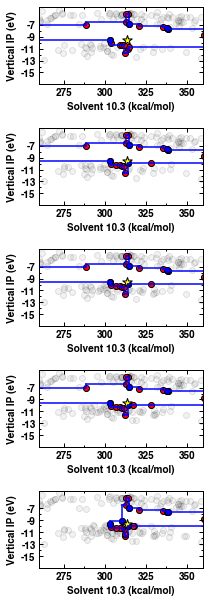

In [24]:
selection_strategy = 'best'
# selection_strategy = 'PI-EGO'

figure = plt.figure(figsize=(3.25,9))
axes = []
margins = .4
for i in range(5):
    fig_height = (1.-margins)/5.
    margin_height = margins/6.
    y_bot = 1.-margin_height*float(i+1)-fig_height*float(i+1)
    axes.append(figure.add_axes([.2,y_bot,.7,fig_height]))
for ax in axes:
    ax.scatter([0],[0])

AL = ActiveLearner('../raw_data/MD2-checked-unqiue.csv',
               ['IP','Solvent 10.3'],[.5,-.35],
                model_type='KRR', feature_type='RACs', 
                extra_features=['ox','charge'],
                verbose=False, random_seed=0)
AL.initialize()
AL.setup_gen_0(.1)
AL.fit()
# AL.plot_2d_gaussian(ax,AL.predictions[2604],AL.uncertainties[2604],
#         x_units='kcal/mol',y_units='eV')
AL.plot(axes[0],x_units='kcal/mol',y_units='eV',
        xlabel='Solvent 10.3 (kcal/mol)',
        ylabel='Vertical IP (eV)',
        xlim=(260,360),ylim=(-17,-4),
        xticks=[275,300,325,350],
        yticks=[-15,-13,-11,-9,-7])
for ax in axes[1:]:
    print('done!')
    AL.advance_generation(selection_strategy=selection_strategy)
    AL.fit()
    AL.plot(ax,x_units='kcal/mol',y_units='eV',
            xlabel='Solvent 10.3 (kcal/mol)',
            ylabel='Vertical IP (eV)',
            xlim=(260,360),ylim=(-17,-4),
            xticks=[275,300,325,350],
            yticks=[-15,-13,-11,-9,-7])
    
plt.savefig('/Users/danielharper/Desktop/strategy_'+selection_strategy+'.png',dpi=800)